<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/dococr/translationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RefDocs: https://note.com/npaka/n/n5146d9a444b4

In [ ]:
#@title fugumt

In [ ]:
!pip install transformers sentencepiece

In [ ]:
from transformers import pipeline

# パイプラインの準備
ej_translator = pipeline("translation", model="staka/fugumt-en-ja")

In [ ]:
# 翻訳するテキスト
text = """Hitori Gotoh, also known as Bocchi-chan, 
is one of the main characters in the manga and anime series, 
Bocchi the Rock!. She is in the first year of Shuka High School and 
is in charge of the guitar and lyrics of the band, Kessoku Band."""

# 翻訳
print(ej_translator(text)[0]["translation_text"])

漫画・アニメシリーズ「Bocchi the Rock!」の主人公のひとりで、修歌高校1年生の時、バンド「けっそくバンド」のギターと歌詞を担当。


In [ ]:
# パイプラインの準備
je_translator = pipeline("translation", model="staka/fugumt-ja-en")

In [ ]:
query = """ あなたはプロの旅行プランナーのように振る舞ってください。１日で大阪を旅行するプランを教えてください。"""
print(je_translator(query)[0]["translation_text"])

Please behave like a professional travel planner, please tell me your plan to travel to Osaka in one day.


In [ ]:
answer = """As I am just a language model, here is my advice for planning a trip from Tokyo to Osaka in one day:

1) Take the shinkansen (bullet train) from Tokyo Station at 7am or earlier if possible. The journey takes around 2 hours and 30 minutes. You can purchase tickets online beforehand through JR East Pass website.

2) Arrive at Shin-Osaka station by 9:30am and take the subway Midosuji Line towards Umeda Sky Building. This will allow you enough time to visit some of the popular attractions such as Dotonbori area, Universal Studios Japan, and Osaka Castle Park.

3) After exploring these places, head back to Shin-Osaka station and catch the bullet train back to Tokyo at 5pm or later. Alternatively, you could stay overnight in Osaka and explore more of its nightlife scene.
 """
print(ej_translator(answer)[0]["translation_text"])

私はただの言語モデルなので、1日で東京から大阪への旅行を計画するための私のアドバイスは次のとおりです。1)東京駅から7時かそれ以前に新幹線(新幹線)に乗る。旅には2時間30分ほどかかる。JR東日本パスのウェブサイトからオンラインでチケットを購入できる。2)新大阪駅に9時半に到着して地下鉄御堂筋線を梅田スカイビルに向かわせる。これは、道堀、ユニバーサル・スタジオ・ジャパン、大阪キャッスル・パークなどの人気アトラクションのいくつかを訪れるのに十分な時間になる。3)これらの場所を探索した後、新大阪駅に戻り、午後5時以降に東京に戻る弾丸を捕まえる。また、大阪で一晩滞在して、そのナイトライフシーンをもっと探索することもできる。


In [ ]:
#@title nllb

In [ ]:
!pip install transformers sentencepiece

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_name = "facebook/nllb-200-distilled-600M"  # 3.3B, 1.3Bあるけど多分無理
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [ ]:
article = "UN Chief says there is no military solution in Syria"
inputs = tokenizer(article, return_tensors="pt")

translated_tokens = model.generate(
    **inputs, forced_bos_token_id=tokenizer.lang_code_to_id["jpn_Jpan"], max_length=30
)
ret = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
print(ret)

国連長官はシリアに軍事的解決はないと


In [ ]:
article = """ We’ve created GPT-4, the latest milestone in OpenAI’s effort in scaling up deep learning. GPT-4 is a large multimodal model (accepting image and text inputs, emitting text outputs) that, while less capable than humans in many real-world scenarios, exhibits human-level performance on various professional and academic benchmarks. For example, it passes a simulated bar exam with a score around the top 10% of test takers; in contrast, GPT-3.5’s score was around the bottom 10%. We’ve spent 6 months iteratively aligning GPT-4 using lessons from our adversarial testing program as well as ChatGPT, resulting in our best-ever results (though far from perfect) on factuality, steerability, and refusing to go outside of guardrails. """
inputs = tokenizer(article, return_tensors="pt")

translated_tokens = model.generate(
    **inputs, forced_bos_token_id=tokenizer.lang_code_to_id["jpn_Jpan"], max_length=200
)
ret = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
print(ret)

GPT-4は,大きな多型モデル (画像とテキスト入力を受け入れ,テキスト出力を発信する) で,現実世界の多くのシナリオにおいて人間よりも能力が低いが,様々な専門的および学術基準で人間のレベルでのパフォーマンスを示しています.例えば,テスト参加者のトップ10%のスコアでシミュレーションバー試験を通過し,GPT-3.5のスコアは,下の10%のスコアでした.


Llama adapter


In [ ]:
!git clone https://github.com/ZrrSkywalker/LLaMA-Adapter.git
%cd LLaMA-Adapter
!pip install -r requirements.txt
!pip install -e .

In [ ]:
%cd /content
!mkdir checkpoints

/content


In [ ]:
!wget https://huggingface.co/nyanko7/LLaMA-7B/raw/main/checklist.chk -P /content/checkpoints
!wget https://huggingface.co/nyanko7/LLaMA-7B/resolve/main/consolidated.00.pth -P /content/checkpoints
!wget https://huggingface.co/nyanko7/LLaMA-7B/raw/main/params.json -P /content/checkpoints
!wget https://huggingface.co/nyanko7/LLaMA-7B/resolve/main/tokenizer.model -P /conent/checkponts

In [ ]:
%cd /content
!mkdir adapterckpts

In [ ]:
!wget https://github.com/ZrrSkywalker/LLaMA-Adapter/releases/download/v.1.0.0/llama_adapter_len10_layer30_release.pth -P /content/adapterckpts

In [ ]:
%cd /content/LLaMA-Adapter/

In [ ]:
# cpu memoryが足りなくて動かせなさそう。
!torchrun --nproc_per_node 1 example.py \
         --ckpt_dir ../checkpoints \
         --tokenizer_path ../checkpoints/tokenizer.model \
         --adapter_path ../adapterckpts/

Download pdf

In [ ]:
!pip install arxiv

In [14]:
import arxiv
ar_title = "Enhancing Detail Preservation for Customized Text-to-Image Generation: A Regularization-Free Approach"
search = arxiv.Search(
        query=f"ti:{ar_title}",
        max_results = 1,
)

In [ ]:
result_list = []
for result in search.results():
    print(result, result.published.year, result.title, result.summary)
    result_list.append(result)

In [16]:
import os

title = result_list[0].title
dirpath = f"/content/papers/{title}"
os.makedirs(dirpath, exist_ok=True)
result_list[0].download_pdf(dirpath=dirpath,filename=f"{title}.pdf")

'/content/papers/Enhancing Detail Preservation for Customized Text-to-Image Generation: A Regularization-Free Approach/Enhancing Detail Preservation for Customized Text-to-Image Generation: A Regularization-Free Approach.pdf'

Easyocr install

In [ ]:
!pip install git+https://github.com/JaidedAI/EasyOCR.git

PDF Image tools

In [ ]:
# pdf image tool install
!sudo apt-get install poppler-utils
!pip install pdf2image
!pip install img2pdf
!pip install pypdf

In [17]:
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

In [21]:
images = convert_from_path(f"/content/papers/{ar_title}/{ar_title}.pdf")

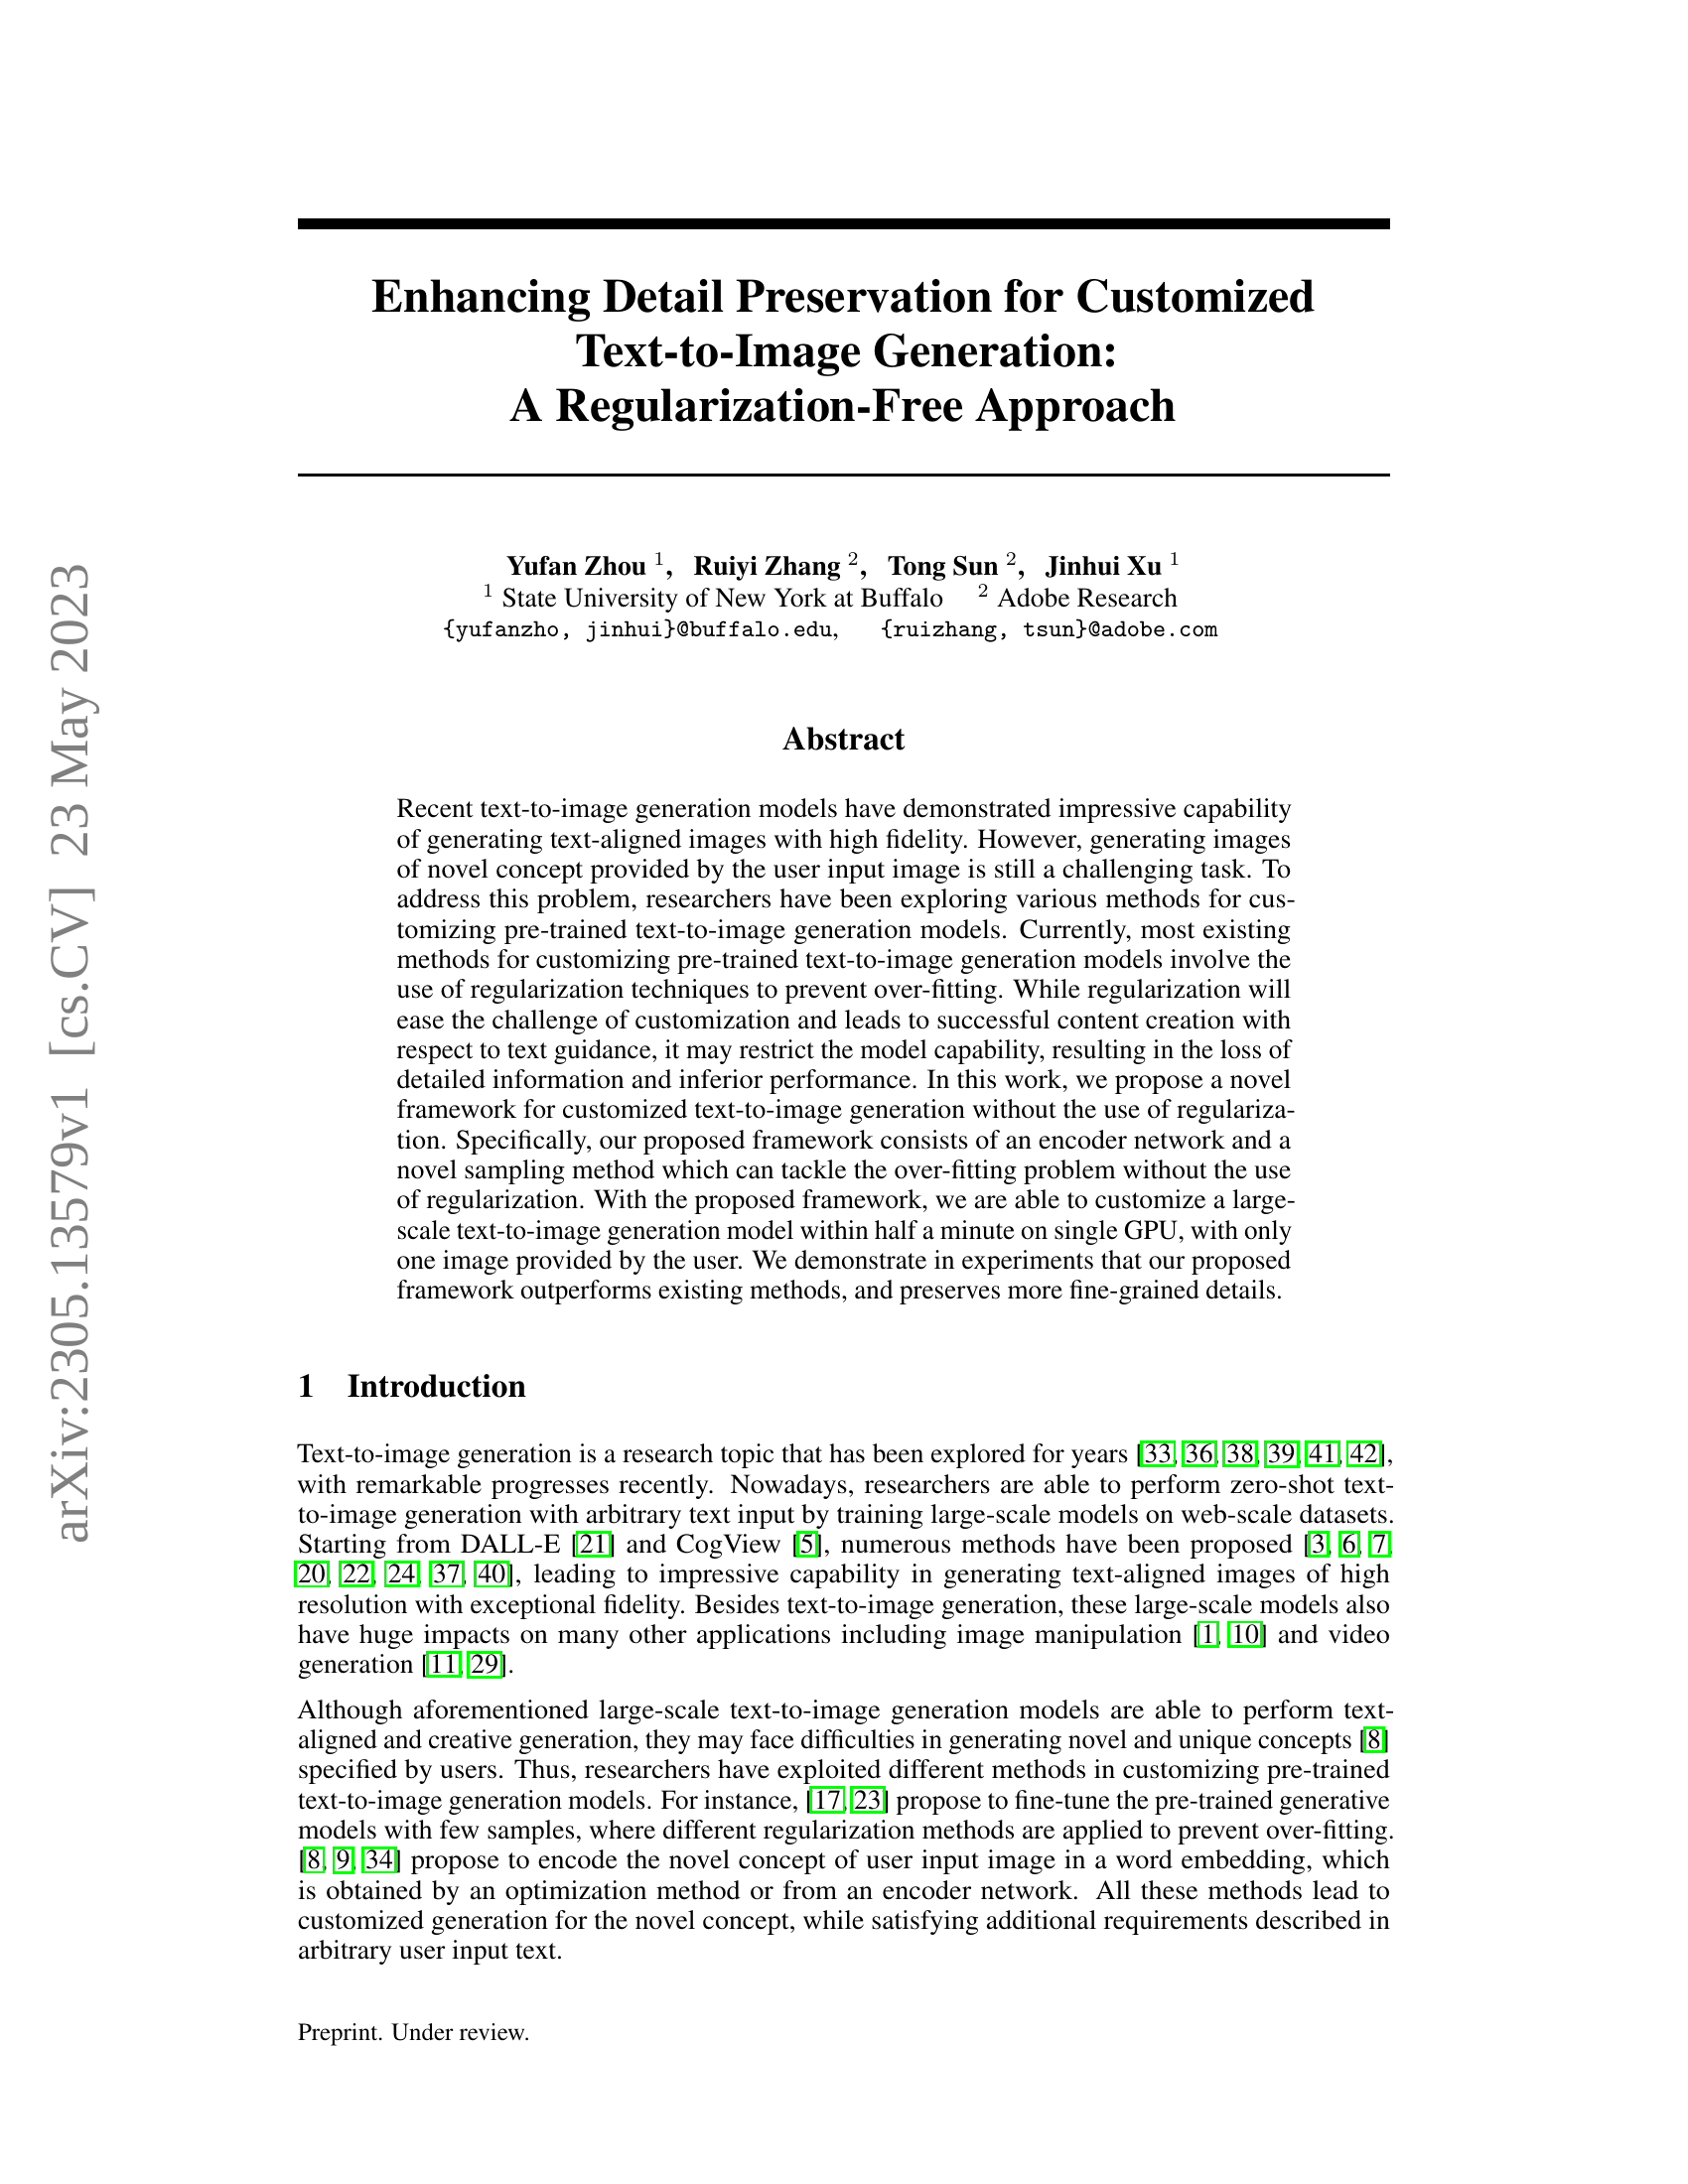

In [22]:
from PIL import Image
display(images[0])

In [ ]:
# DiT Install
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install gradio
%cd /content
!git clone https://github.com/microsoft/unilm.git

%cd /content
!wget https://huggingface.co/spaces/nielsr/dit-document-layout-analysis/raw/main/cascade_dit_base.yml
!wget https://huggingface.co/spaces/nielsr/dit-document-layout-analysis/raw/main/Base-RCNN-FPN.yml

In [ ]:
!pip install timm

In [23]:
%cd /content

# Please change data_structure.py
# from collections import Iterable -> from collections.abc import Iterable

import os
# code: https://huggingface.co/spaces/nielsr/dit-document-layout-analysis/blob/main/app.py
import sys
sys.path.append("unilm")

import cv2

from unilm.dit.object_detection.ditod import add_vit_config

import torch

from detectron2.config import CfgNode as CN
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor

import gradio as gr


# Step 1: instantiate config
cfg = get_cfg()
add_vit_config(cfg)
cfg.merge_from_file("cascade_dit_base.yml")

# Step 2: add model weights URL to config
cfg.MODEL.WEIGHTS = "https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-b_cascade.pth"

# Step 3: set device
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Step 4: define model
predictor = DefaultPredictor(cfg)


def analyze_image(img):
    md = MetadataCatalog.get(cfg.DATASETS.TEST[0])
    if cfg.DATASETS.TEST[0]=='icdar2019_test':
        md.set(thing_classes=["table"])
    else:
        md.set(thing_classes=["text","title","list","table","figure"])
    
    output = predictor(img)["instances"]
    v = Visualizer(img[:, :, ::-1],
                    md,
                    scale=1.0,
                    instance_mode=ColorMode.SEGMENTATION)
    result = v.draw_instance_predictions(output.to("cpu"))
    result_image = result.get_image()[:, :, ::-1]
    
    return result_image

/content


In [ ]:
# for gradio demo
"""
# gradio demo
title = "Interactive demo: Document Layout Analysis with DiT"
description = "Demo for Microsoft's DiT, the Document Image Transformer for state-of-the-art document understanding tasks. This particular model is fine-tuned on PubLayNet, a large dataset for document layout analysis (read more at the links below). To use it, simply upload an image or use the example image below and click 'Submit'. Results will show up in a few seconds. If you want to make the output bigger, right-click on it and select 'Open image in new tab'."
article = "<p style='text-align: center'><a href='https://arxiv.org/abs/2203.02378' target='_blank'>Paper</a> | <a href='https://github.com/microsoft/unilm/tree/master/dit' target='_blank'>Github Repo</a></p> | <a href='https://huggingface.co/docs/transformers/master/en/model_doc/dit' target='_blank'>HuggingFace doc</a></p>"
examples =[['publaynet_example.jpeg']]
css = ".output-image, .input-image, .image-preview {height: 600px !important}"

iface = gr.Interface(fn=analyze_image, 
                     inputs=gr.inputs.Image(type="numpy", label="document image"), 
                     outputs=gr.outputs.Image(type="numpy", label="annotated document"),
                     title=title,
                     description=description,
                     examples=examples,
                     article=article,
                     css=css,
                     enable_queue=True)
iface.launch(debug=True, cache_examples=True)
"""

In [71]:
import numpy as np
img_id = 5
res_img = analyze_image(np.asarray(images[img_id]))

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


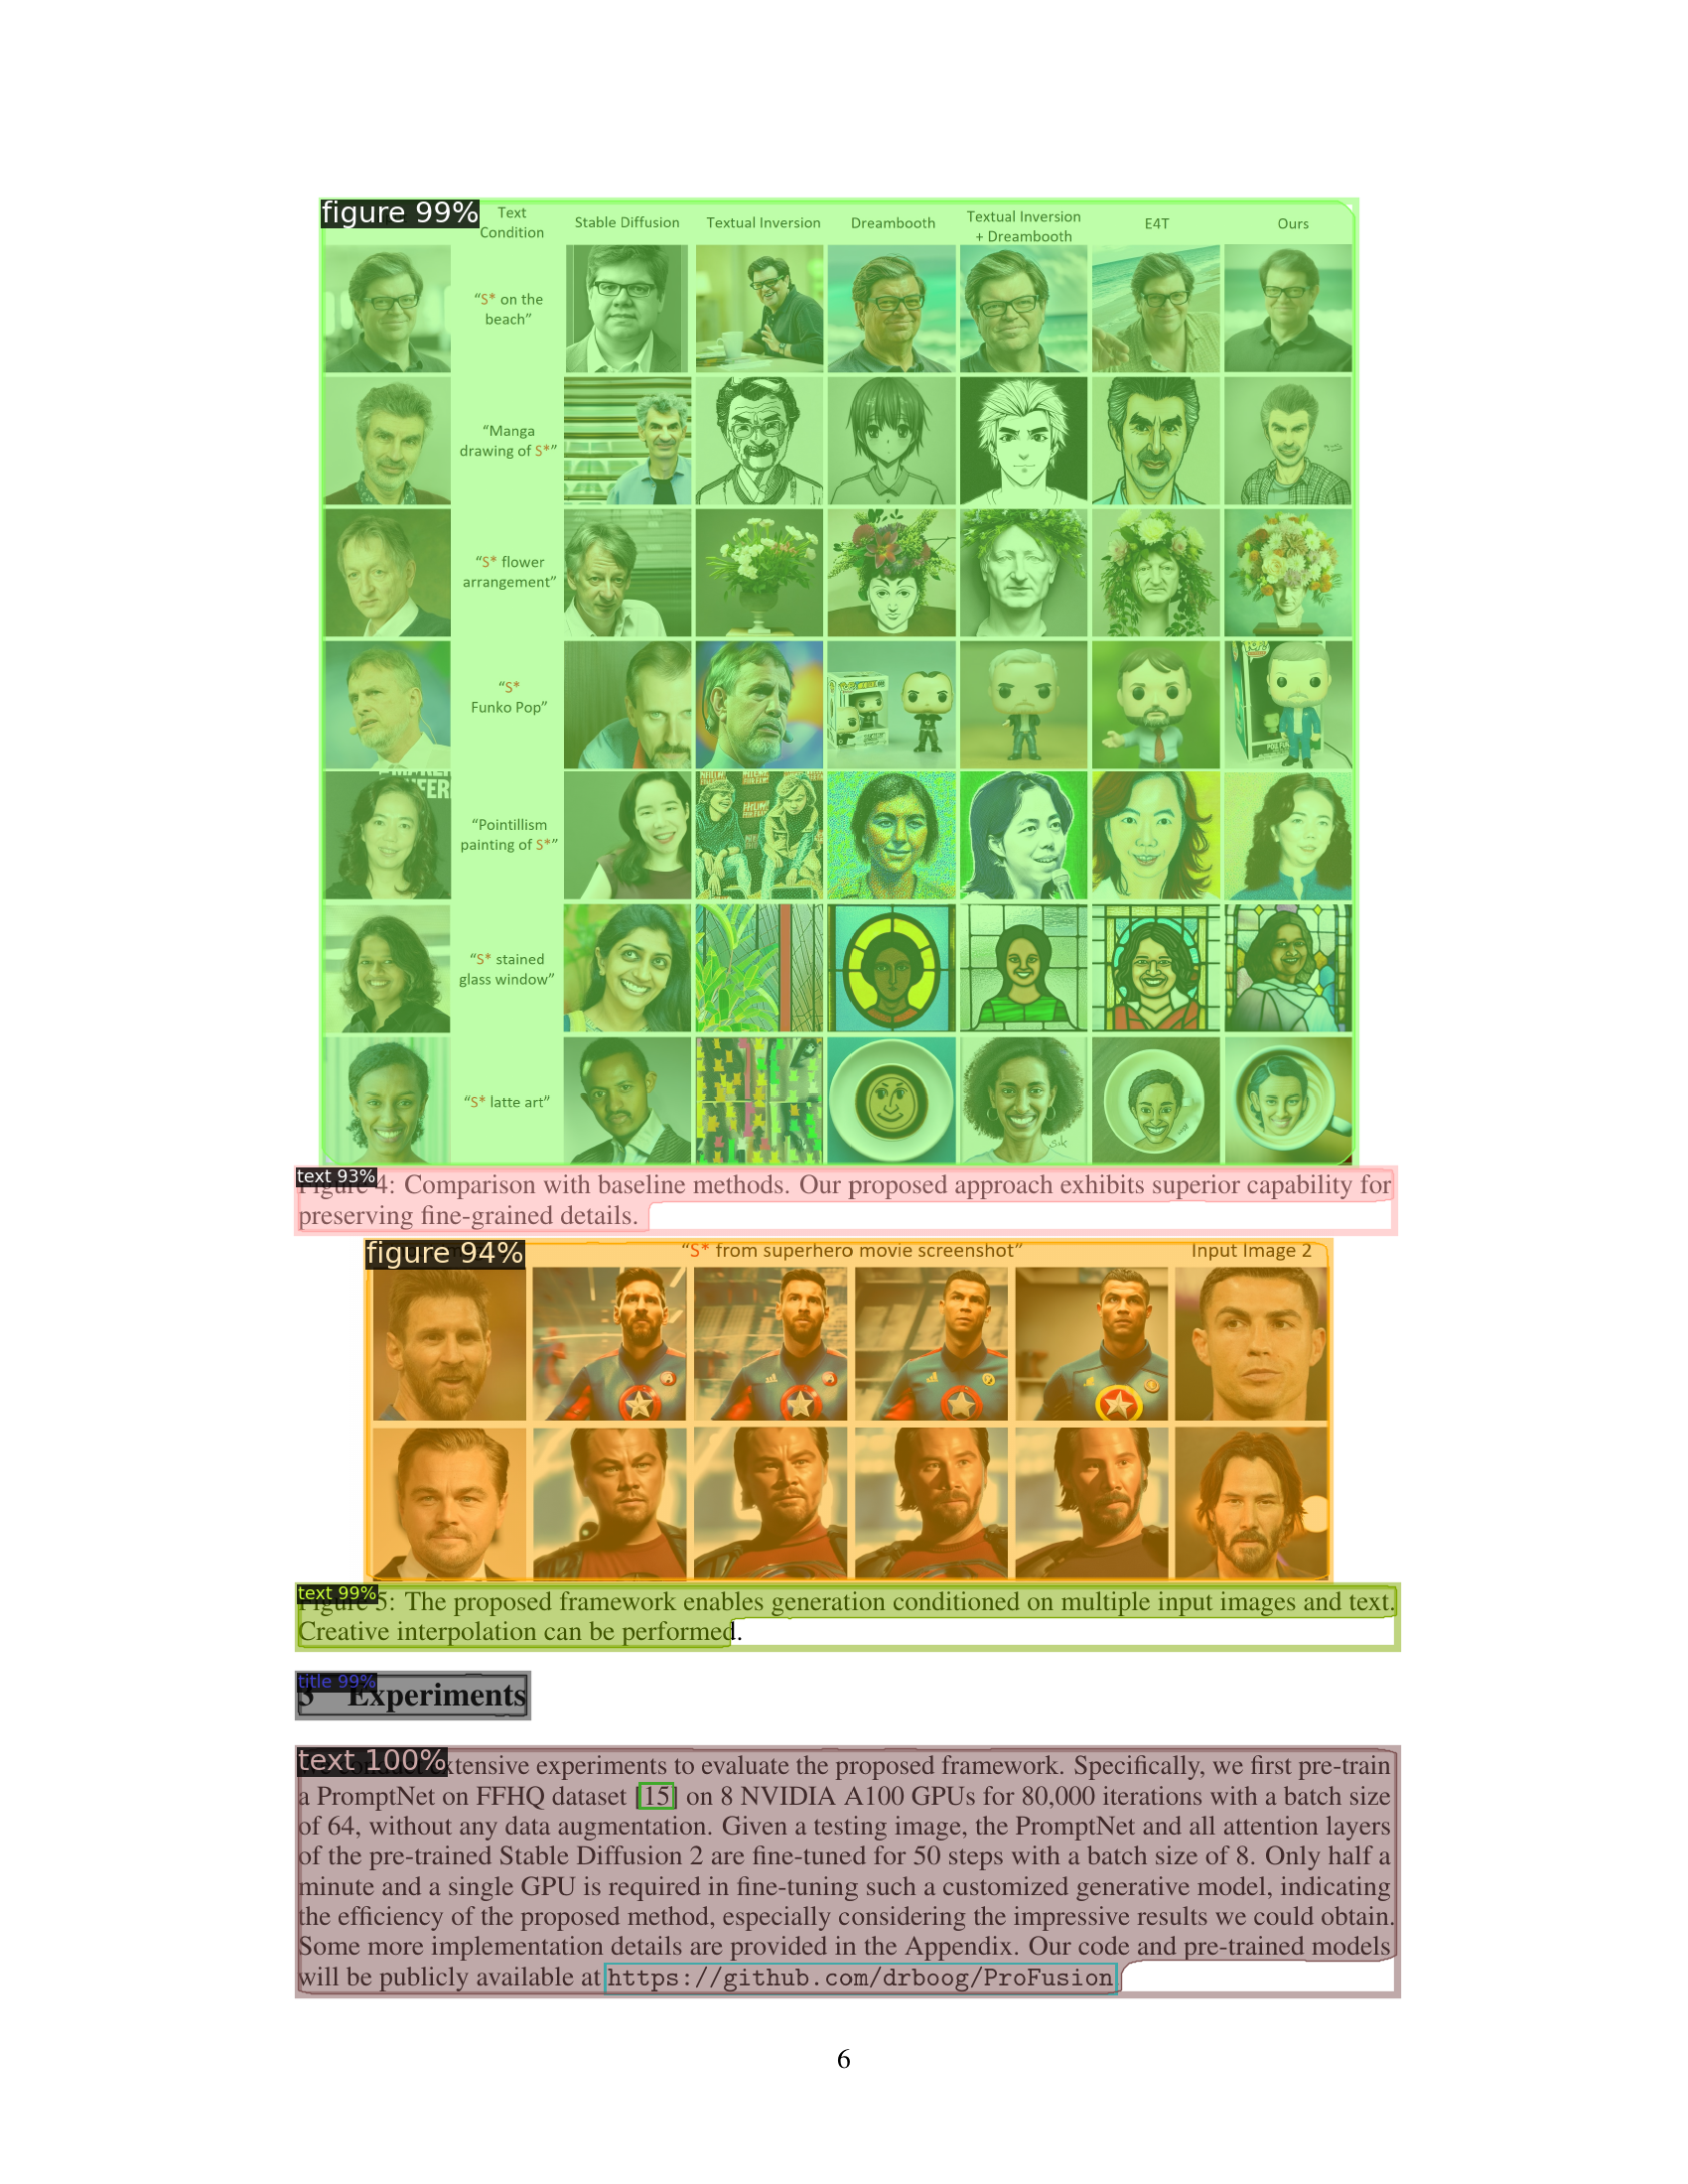

In [72]:
display(Image.fromarray(res_img))

Only inference

In [24]:
import easyocr
import cv2
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

In [28]:
import numpy as np
# utils function
def create_ocr_sentence(img, img_type):
  save_img_path = f"{img_type}.jpg"
  cv2.imwrite(save_img_path, img)
  ocr_result = reader.readtext(save_img_path, detail=0)
  ocr_str = ""
  for orr in ocr_result:
    ocr_str += f"{orr} "
  ocr_str = ocr_str[:-1]
  
  return ocr_str

def create_ocr_and_textimg(text_imgs):
  text_str = ""
  base_text = None
  bh = 0
  bw = 0
  # text_imgs = class_imgs["text"]
  for text in text_imgs:
    cv2.imwrite("text.jpg", text)
    if base_text is None:
      base_text = text
      bh, bw = base_text.shape[:2]
    else:
      res_text = cv2.resize(text, (bw, bh))
      base_text = np.concatenate([base_text, res_text], 0)
    text_result = reader.readtext("text.jpg",  detail = 0)
        
    for tr in text_result:
      text_str += f"{tr} "
  text_str = text_str[:-1]

  return text_str, base_text

In [29]:
# inference function
def inference_at_onepage(img_id, images, predictor, ocr_reader, result_json, score_threshold=0.5, draw=False):
  img = np.asarray(images[img_id])
  # inference with unilm
  output = predictor(img)["instances"]
  id2label = {0:"text",1:"title",2:"list",3:"table",4:"figure"}
  class_imgs = {"text": [], "title": [], "list": [], "table": [], "figure": []}
  image_height, image_width = output.image_size
  for pc, pb, ps in zip(output.pred_classes, output.pred_boxes, output.scores):
    if ps.detach().cpu().numpy() < score_threshold:
      continue
    class_id = int(pc.detach().cpu().numpy())
    bbox_numpy = pb.detach().cpu().numpy()
    # print(id2label[class_id])
    # print(bbox_numpy)
    h = int(bbox_numpy[3] - bbox_numpy[1])
    w = int(bbox_numpy[2] - bbox_numpy[0])
    if pc == 0 and h < 100:
      continue
    crop_img = img[int(bbox_numpy[1]):int(bbox_numpy[3]), int(bbox_numpy[0]):int(bbox_numpy[2]), :]
    class_imgs[id2label[class_id]].append(crop_img)
    if draw:
      display(id2label[class_id], Image.fromarray(crop_img))

  # store other classes
  class_types = ["list", "table", "figure"]
  for clt in class_types:
    if len(class_imgs[clt]) > 0:
      if clt not in result_json.keys():
        result_json[clt] = class_imgs[clt]
      else:
        result_json[clt].extend(class_imgs[clt])
  

  # get result json
  if img_id == 0:
    for idx, (title, text) in enumerate(zip(class_imgs["title"], class_imgs["text"])):
      if idx == 0:
        title_str = create_ocr_sentence(title, "title")
        text_str = create_ocr_sentence(text, "text")

        result_json["other_text"] = [text_str]
        result_json["title"] = title_str

        # display result
        if draw:
          display(Image.fromarray(title), title_str)
          display(Image.fromarray(text), text_str)
        
        # add img
        if len(class_imgs["figure"]) > 0:
          result_json["title" + "_figure"] = class_imgs["figure"]

      else:
        title_str = create_ocr_sentence(title, "title")
        text_str = create_ocr_sentence(text, "text")

        result_json[title_str] = text_str 

        # display result
        if draw:
          display(Image.fromarray(title), title_str)
          display(Image.fromarray(text), text_str)

        if len(class_imgs["figure"]) > 0:
          result_json[title_str + "_figure"] = class_imgs["figure"]
  else:
    if "title" in class_imgs.keys():
      for title in class_imgs["title"]:
        title_str = create_ocr_sentence(title, "title")

        text_str, base_text = create_ocr_and_textimg(class_imgs["text"])
        result_json[title_str] = text_str

        # display result
        if draw:
          display(Image.fromarray(title), title_str)
          display(Image.fromarray(base_text), text_str)
        
        if len(class_imgs["figure"]) > 0:
          result_json[title_str + "_figure"] = class_imgs["figure"]
    else:
      text_str, base_text = create_ocr_and_textimg(class_imgs["text"])

      if "other_text" not in result_json.keys():
        result_json["other_text"] = []
      else:
        result_json["other_text"].append(text_str)

      if draw:
        display("other text")
        display(Image.fromarray(base_text), text_str)

      if len(class_imgs["figure"]) > 0:
          result_json["other_figure"] = class_imgs["figure"]

  return result_json

Inference onepage

In [131]:
result_json = {}
img_id = 1
result_json = inference_at_onepage(img_id, images, predictor, reader, result_json, draw=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


In [132]:
print(result_json.keys())

dict_keys(['list', 'figure', '2 Methodology', '2 Methodology_figure'])


Inference full pdf

In [30]:
result_json = {}
for img_id in range(10):
  result_json = inference_at_onepage(img_id, images, predictor, reader, result_json, draw=False)
print(result_json.keys())

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradi

dict_keys(['other_text', 'title', 'Introduction', 'Abstract', 'list', 'figure', '2 Methodology', '2 Methodology_figure', '2.1 Fusion Sampling', '3 Experiments', '3 Experiments_figure', '3.2 Quantitative Results', '3.2 Quantitative Results_figure', '3.1 Qualitative Results', '3.1 Qualitative Results_figure', '3.4 Ablation Study', '3.4 Ablation Study_figure', '3.3 Human Evaluation', '3.3 Human Evaluation_figure', '4 Discussion', '4 Discussion_figure', '5 Conclusion', '5 Conclusion_figure', 'References'])


RedPajama INCITE 3B chat

In [ ]:
!pip install transformers accelerate sentencepiece bitsandbytes

In [ ]:
!pip install langchain

In [2]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

In [3]:
# init
tokenizer = AutoTokenizer.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1")
model = AutoModelForCausalLM.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1", torch_dtype=torch.float16, device_map="auto")
model = model.to('cuda:0')

In [4]:
# inference samples for llm
prompt = """
<human>: Please summarize the following context. \n Context: 
Recent text-to-image generation models have demonstrated impressive capability of generating text-aligned images with high fidelity: However; generating images of novel concept provided by the user input image is still challenging task: To address this problem, researchers have been exploring various methods for cus tomizing pre-trained text-to-image generation models. Currently, most existing methods for customizing pre-trained text-to-image generation models involve the use of regularization techniques to prevent over-- While regularization will ease the challenge of customization and leads to successful content creation with respect to text guidance, it may restrict the model capability, resulting in the loss of detailed information and inferior performance. In this work, we propose a novel framework for customized text-to-image generation without the use of regulariza tion. Specifically, Our proposed framework consists of an encoder network and novel sampling method which can tackle the over-fitting problem without the use of regularization:  With the proposed framework; we are able to customize large scale text-to-image generation model within half a minute on single GPU, with only one image provided by the user: We demonstrate in experiments that OUr proposed framework outperforms existing methods, and preserves more ~grained details. -fitting: fine-
\n<bot>:"""
inputs = tokenizer(prompt, return_tensors='pt').to(model.device)
input_length = inputs.input_ids.shape[1]
outputs = model.generate(
    **inputs, max_new_tokens=256, do_sample=True, temperature=0.7, top_p=0.7, top_k=50, return_dict_in_generate=True
)
token = outputs.sequences[0, input_length:]
output_str = tokenizer.decode(token)
print(output_str)


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 The following context is about text-to-image generation. Recently, text-to-image generation models have demonstrated impressive capability of generating text-aligned images with high fidelity. However, generating images of novel concept provided by the user input image is still challenging task. To address this problem, researchers have been exploring various methods for customizing pre-trained text-to-image generation models. Currently, most existing methods for customizing text-to-image generation models involve the use of regularization techniques to prevent over-fitting. However, regularization will ease the challenge of customization and leads to successful content creation with respect to text guidance, but may restrict the model capability, resulting in the loss of detailed information and inferior performance. In this work, we propose a novel framework for customized text-to-image generation without the use of regularization. Specifically, Our proposed framework consists of an

In [4]:
# create custom llm
from langchain.llms.base import LLM
from langchain import PromptTemplate
from typing import Any, List, Mapping, Optional
from langchain.callbacks.manager import CallbackManagerForLLMRun

In [33]:
# custom llm model
class RedPajamaINCITELLM(LLM):
    
    n: int
        
    @property
    def _llm_type(self) -> str:
        return "custom"
    
    def _call(
        self,
        prompt: str,
        stop: Optional[List[str]] = None,
        run_manager: Optional[CallbackManagerForLLMRun] = None,
    ) -> str:
        if stop is not None:
            raise ValueError("stop kwargs are not permitted.")
        inputs = tokenizer(prompt, return_tensors='pt').to(model.device)
        input_length = inputs.input_ids.shape[1]

        with torch.no_grad():
          outputs = model.generate(
              **inputs, max_new_tokens=128, do_sample=True, temperature=0.7, top_p=0.7, top_k=50, return_dict_in_generate=True
              )
        token = outputs.sequences[0, input_length:]
        output_str = tokenizer.decode(token).split("<human>")[0]
        # print("Model Response:", response)
        return output_str
    
    @property
    def _identifying_params(self) -> Mapping[str, Any]:
        """Get the identifying parameters."""

        return {"n": self.n}

In [34]:
template = """
<human>: Please summarize the following context. \n Context: {context} \n<bot>:"""

prompttemp = PromptTemplate(
    input_variables=["context"],
    template=template,
)

llm = RedPajamaINCITELLM(n=400)

In [13]:
# check llm inference
context = "Recent text-to-image generation models have demonstrated impressive capability of generating text-aligned images with high fidelity: However; generating images of novel concept provided by the user input image is still challenging task: To address this problem, researchers have been exploring various methods for cus tomizing pre-trained text-to-image generation models. Currently, most existing methods for customizing pre-trained text-to-image generation models involve the use of regularization techniques to prevent over-- While regularization will ease the challenge of customization and leads to successful content creation with respect to text guidance, it may restrict the model capability, resulting in the loss of detailed information and inferior performance. In this work, we propose a novel framework for customized text-to-image generation without the use of regulariza tion. Specifically, Our proposed framework consists of an encoder network and novel sampling method which can tackle the over-fitting problem without the use of regularization:  With the proposed framework; we are able to customize large scale text-to-image generation model within half a minute on single GPU, with only one image provided by the user: We demonstrate in experiments that OUr proposed framework outperforms existing methods, and preserves more ~grained details. -fitting: fine-"

print(llm(
    prompttemp.format(
        context=context
    )
))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 The following is a summary of the context given in the text:

Recent text-to-image generation models have demonstrated impressive capability of generating text-aligned images with high fidelity. However, generating images of novel concept provided by the user input image is still challenging task. Researchers have been exploring various methods for customizing pre-trained text-to-image generation models. However, regularization will ease the challenge of customization and leads to successful content creation with respect to text guidance, but may restrict the model capability, resulting in the loss of detailed information and inferior performance. In this work, we propose a novel framework for customized text-to-image generation without the use of regularization. Specifically, Our proposed framework consists of an encoder network and novel sampling method which can tackle the over-fitting problem without the use of regularization. With the proposed framework; we are able to customize 

PDF handling

In [ ]:
import img2pdf
import cv2
 
text_img = class_imgs["text"][0]
cv2.imwrite("1.jpg", text_img)

# 1つの画像をPDFに変換する 
with open("1.pdf", "wb") as f: 
    f.write(img2pdf.convert('1.jpg'))

In [ ]:
import pypdf
src_pdf = pypdf.PdfReader("1.pdf")
print(src_pdf)

PowerPoint

In [ ]:
!pip install python-pptx

In [99]:
print(result_json.keys())

dict_keys(['other_text', 'title', 'Introduction', 'Abstract', 'list', 'figure', '2 Methodology', '2.1 Fusion Sampling', '3 Experiments', '3.2 Quantitative Results', '3.1 Qualitative Results', '3.4 Ablation Study', '3.3 Human Evaluation', '4 Discussion', '5 Conclusion', 'References'])


In [35]:
from pptx.util import Inches, Pt
from pptx.enum.text import MSO_ANCHOR, MSO_AUTO_SIZE
from pptx import  Presentation
prs = Presentation()

# title slide
title_slide_layout = prs.slide_layouts[0]	# "タイトルとスライド"のレイアウトオブジェクトを取得
sld_title = prs.slides.add_slide(title_slide_layout)
sld_title.placeholders[0].text = result_json["title"]

# create abstract slide
title_slide_layout = prs.slide_layouts[1]
sld_abst = prs.slides.add_slide(title_slide_layout)

for p in sld_abst.placeholders:
  print(p.name)

insert_type = "Abstract"
sld_abst.placeholders[0].text = insert_type

summ_str = llm(
    prompttemp.format(
        context=result_json[insert_type]
    )
)

sld_abst.placeholders[1].text = summ_str

shapes = sld_abst.shapes

for idx, (shape, sent) in enumerate(zip(shapes, [insert_type, summ_str])):
  text_frame = shape.text_frame
  text_frame.clear()

  if idx == 0:
    p = text_frame.paragraphs[0]
    run = p.add_run()
    run.text = sent

    font = run.font
    font.name = 'Calibri'
    font.size = Pt(18)
  else:
    p = text_frame.paragraphs[0]
    run = p.add_run()
    run.text = sent

    font = run.font
    font.name = 'Calibri'
    font.size = Pt(14)


# create overview slide
title_slide_layout = prs.slide_layouts[8] # "タイトル付き図"のレイアウトオブジェクトを取得
sld_ovw = prs.slides.add_slide(title_slide_layout) #  新しいスライドを追加

for p in sld_ovw.placeholders:
  print(p.name)               			  # >>Title 1　Picture Placeholder 2　Text Placeholder 3

#------------------------------------------------------------------------------------------------------
insert_type = "2 Methodology"
overview_img = result_json[insert_type + "_figure"][0]
cv2.imwrite("overview.png", cv2.cvtColor(overview_img, cv2.COLOR_RGB2BGR))
sld_ovw.placeholders[0].text = insert_type             
sld_ovw.placeholders[1].insert_picture('overview.png') # 画像ファイルを画像プレースフォルダーに貼り付ける

summ_str = summ_str = llm(
    prompttemp.format(
        context=result_json[insert_type]
    )
)

sld_ovw.placeholders[2].text = summ_str


# create experiment slide
title_slide_layout = prs.slide_layouts[8] # "タイトル付き図"のレイアウトオブジェクトを取得
sld_exp = prs.slides.add_slide(title_slide_layout) #  新しいスライドを追加

for p in sld_exp.placeholders:
  print(p.name)               			  # >>Title 1　Picture Placeholder 2　Text Placeholder 3

#------------------------------------------------------------------------------------------------------
insert_type = "3 Experiments"
target_img = result_json[insert_type + "_figure"][0]
cv2.imwrite("experiment.png", cv2.cvtColor(target_img, cv2.COLOR_RGB2BGR))
sld_exp.placeholders[0].text = insert_type             
sld_exp.placeholders[1].insert_picture('experiment.png') # 画像ファイルを画像プレースフォルダーに貼り付ける

summ_str = llm(
    prompttemp.format(
        context=result_json[insert_type]
    )
)

sld_exp.placeholders[2].text = summ_str


# create discussion slide
title_slide_layout = prs.slide_layouts[8] # "タイトル付き図"のレイアウトオブジェクトを取得
sld_exp = prs.slides.add_slide(title_slide_layout) #  新しいスライドを追加

for p in sld_exp.placeholders:
  print(p.name)               			  # >>Title 1　Picture Placeholder 2　Text Placeholder 3

#------------------------------------------------------------------------------------------------------
insert_type = "4 Discussion"
target_img = result_json[insert_type + "_figure"][0]
cv2.imwrite(f"{insert_type}.png", cv2.cvtColor(target_img, cv2.COLOR_RGB2BGR))
sld_exp.placeholders[0].text = insert_type             
sld_exp.placeholders[1].insert_picture(f'{insert_type}.png') # 画像ファイルを画像プレースフォルダーに貼り付ける

summ_str = llm(
    prompttemp.format(
        context=result_json[insert_type]
    )
)

sld_exp.placeholders[2].text = summ_str

prs.save('doc.pptx')


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Title 1
Content Placeholder 2


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Title 1
Picture Placeholder 2
Text Placeholder 3


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Title 1
Picture Placeholder 2
Text Placeholder 3


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Title 1
Picture Placeholder 2
Text Placeholder 3
